---
---

# Miniproyecto 2

---
---

Nombre:
----------

Mallén Arenas

Puntajes:
-----------

0.- 2 ptos.

1.- 5 ptos.

2.- 5 ptos.

3.- 10 ptos.

4.- 18 ptos.

5.- 25 ptos.

6.- 25 ptos.

7.- 5 ptos.

8.- 5 ptos.


Total:
-------
100 ptos.

## 0.- Cargar librerías y explicar sus usos (2 ptos.):

Respuesta:
---
    
    
Partimos importando las librerías numpy que nos permite trabajar con arrays y pandas que nos permite importar los datos y pasarlo a un dataframe. Luego importamos las librerías matplotlib y seaborn para poder hacer los gráficos y la librería graphviz para hacer el grafo del árblol de decisión.
De la librería sklearn.model_selection importamos la función train_test_split que nos separa los datos en la parte de entrenamiento y de test. StandardScaler y LabelEncode nos sirve para normalizar los datos continuos y pasar a númerico los datos categóricos. Finalmente importamos KNeighborsClassifier y tree para el algoritmo KNN y árbol de decisión respectivamente.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

## 1.- Cargar datasets y explorar los datos. Explicar las características de los dataset (estadísticas, datos Nan, datos únicos, etc.) (5 ptos.):

Apoyarse en la documentación de Pandas https://pandas.pydata.org/pandas-docs/stable/index.html y Seaborn https://seaborn.pydata.org/index.html

Respuesta:
---
    
    
Primero leemos los datos y los pasamos a un DataFrame llamado df. Con df.columns podemos ver el nombre de todas las variables que trae el conjunto de datos. Usamos describe para obtener medidas de resumen, como tenemos muchas variables categoricas utilizamos el parámetro include='all'. Utilizamos isna.sum para revisar si hay datos faltantes, los cuales no se encuentran en el conjunto de datos. Por último con unique y nunique podemos revisar las categorías de cada variable.

In [ ]:
df = pd.read_csv('bank.csv', sep=';')

In [ ]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
df['y'].nunique()

2

In [ ]:
df['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

## 2.- Generar dos graficos que caractericen los datos y explicarlos (5 ptos.):

Apoyarse en la documentación de Matplotlib https://matplotlib.org/ y Seaborn https://seaborn.pydata.org/index.html

Respuesta:
---
    
    
Para conocer un poco más de los datos, podemos hacer diversos tipos de gráficos, por ejemplo para datos categóricos podemos hacer gráficos de torta o de barras, acá mostramos estos gráficos para las columnas education y job. Para las variables continuas podemos hacer histogramas que nos muestran su distribución. Acá lo estamos realizando para las columnas duration y balance.

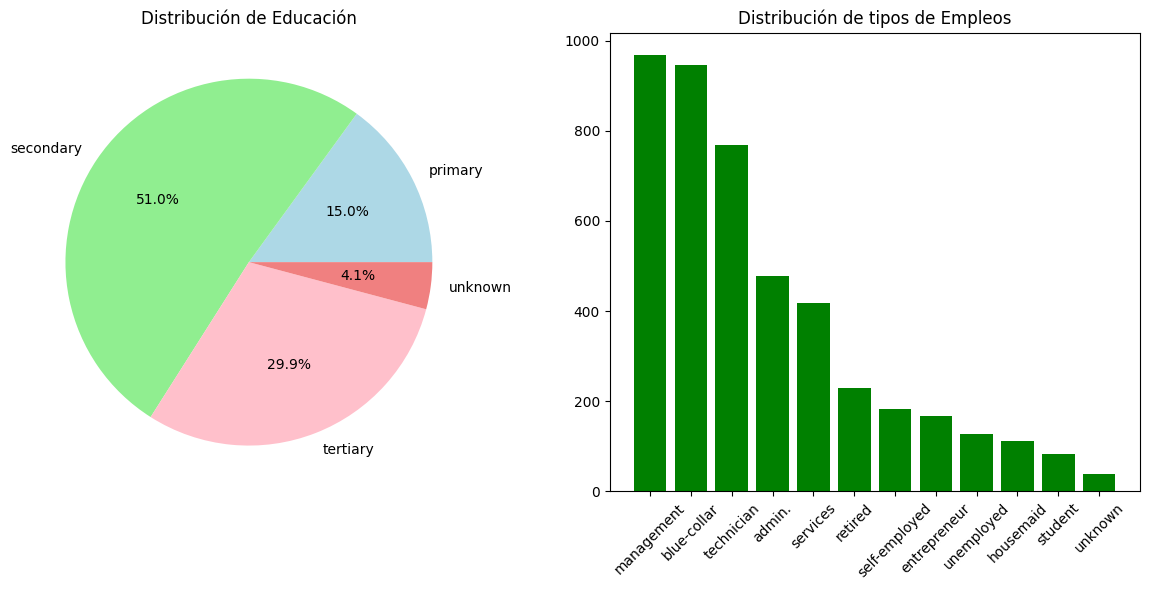

In [ ]:
categorias = df['education']
conteo_categorias = {}
for categoria in categorias:
    conteo_categorias[categoria] = conteo_categorias.get(categoria, 0) + 1
categ = list(conteo_categorias.keys())
cantidades = list(conteo_categorias.values())

educacion_categorias = df['job'].value_counts().index
educacion_valores = df['job'].value_counts().values

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(cantidades, labels=categ, autopct='%1.1f%%',
           colors=['lightblue', 'lightgreen', 'pink', 'lightcoral'])
axs[0].set_title('Distribución de Educación')

axs[1].bar(educacion_categorias, educacion_valores, color='green')
axs[1].set_title('Distribución de tipos de Empleos')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

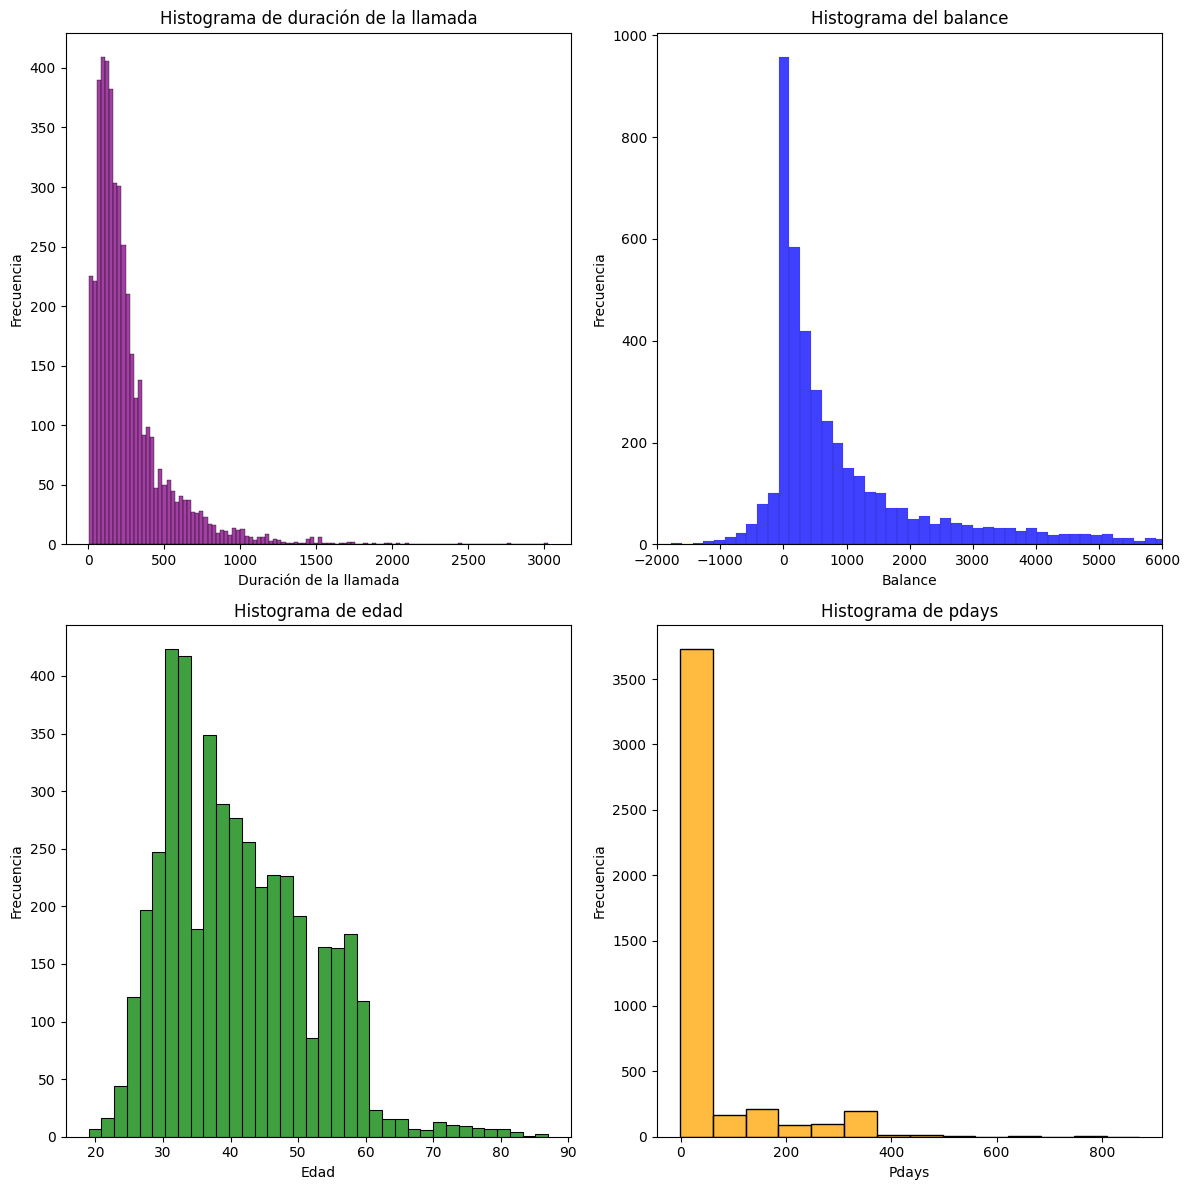

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))  # 2 filas y 2 columnas de subplots

# Histograma para la columna "duration"
sns.histplot(df["duration"], kde=False, color='purple', ax=axes[0, 0])
axes[0, 0].set_xlabel('Duración de la llamada')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Histograma de duración de la llamada')

# Histograma para la columna "balance" con límites en el rango -1000 a 1000
sns.histplot(df["balance"], kde=False, color='blue', ax=axes[0, 1])
axes[0, 1].set_xlim(-2000, 6000)
axes[0, 1].set_xlabel('Balance')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Histograma del balance')

# Histograma para la columna "age"
sns.histplot(df["age"], kde=False, color='green', ax=axes[1, 0])
axes[1, 0].set_xlabel('Edad')
axes[1, 0].set_ylabel('Frecuencia')
axes[1, 0].set_title('Histograma de edad')

# Histograma para la columna "pdays"
sns.histplot(df["pdays"], kde=False, color='orange', ax=axes[1, 1])
axes[1, 1].set_xlabel('Pdays')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].set_title('Histograma de pdays')

plt.tight_layout()

## 3.- Limpiar dataset, trabajar missing data, homogeneizar datos.
## Explicar las decisiones tomadas y los pasos realizados (10 ptos.):

Apoyarse en la documentación de Pandas para los distintos tipos de uniones https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Respuesta:
---
    
    
Como habíamos visto con anterioridad no tenemos datos nulos, pero podrían haber otros tipos de datos inconsistentes con la realidad. Para términos del trabajo, para las variables categóricas podemos verificar con la función unique que tipos de categorías. Esto con el fin de verificar si no hay categorías de más o inconsistentes. verificamos que categorías como 'unknown' y 'other' son catagorías que si queremos considerar, ya que se consideran en el archivo txt que explica cada variable. Por lo que no tenemos que completar información.

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df['contact'].unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20, 13, 30, 29, 27,  7, 18, 12,
       21, 26, 22,  2,  4, 15,  8, 28,  9,  1, 10, 31, 25, 24])

In [ ]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [ ]:
df['campaign'].unique()

array([ 1,  4,  2,  5,  3,  6, 18, 10,  9,  7, 12, 14, 13, 24, 11,  8, 29,
       32, 16, 22, 15, 30, 25, 21, 17, 19, 23, 20, 50, 28, 31, 44])

In [ ]:
df['previous'].unique()

array([ 0,  4,  1,  3,  2,  5, 20,  7,  6, 10,  9,  8, 18, 19, 12, 13, 11,
       14, 15, 24, 17, 22, 23, 25])

In [ ]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

## 4.- Transformar datos a numérico, generar matriz de atributos, generar vector de label y normalizar los datos, explicar el tipo de normalización utilizada (recordar que es normalización de datos y no normalización de base de datos, i.e. Standard Scaler, MinMax Scaler, etc.)
## Explicar las decisiones tomadas y los pasos realizados (18 ptos.):


Apoyarse en la documentación de Scikit-Learn para los distintos tipos de normalización de datos https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Respuesta:
---
    
    
En primer lugar vamos a usar LabelEncoder para poder transformar cada una de las variables categoricas a variables numericas. Nos aseguramos de guardar las codificaciones para poder entender despues nuestro modelo y creamos la matriz de atributos. Luego normalizamos las variables continuas con el método StandardScaler, esto ya que, como vimos en los histogramas realizados anteriormente, tenemos distintas escalas y rangos de datos.

In [ ]:
#df_encoder = pd.DataFrame()
label_encoders = {}

# Iterar sobre las columnas del DataFrame original
for column in df.columns:
    if df[column].dtype == 'object':  # Verificar si la columna es categórica
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    #else:
     #   df_encoder[column] = df[column]

df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [ ]:
asignaciones = {}
for column, encoder in label_encoders.items():
    asignaciones[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

asignaciones

{'job': {'admin.': 0,
  'blue-collar': 1,
  'entrepreneur': 2,
  'housemaid': 3,
  'management': 4,
  'retired': 5,
  'self-employed': 6,
  'services': 7,
  'student': 8,
  'technician': 9,
  'unemployed': 10,
  'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'default': {'no': 0, 'yes': 1},
 'housing': {'no': 0, 'yes': 1},
 'loan': {'no': 0, 'yes': 1},
 'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'month': {'apr': 0,
  'aug': 1,
  'dec': 2,
  'feb': 3,
  'jan': 4,
  'jul': 5,
  'jun': 6,
  'mar': 7,
  'may': 8,
  'nov': 9,
  'oct': 10,
  'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3},
 'y': {'no': 0, 'yes': 1}}

In [ ]:
num_filas = df.shape[0]
num_columnas = sum(len(mapping) for mapping in asignaciones.values())
matriz_atributos = np.zeros((num_filas, num_columnas))

col_idx = 0
for column, mapping in asignaciones.items():
    for categoria, numero in mapping.items():
        matriz_atributos[:, col_idx] = (df[column] == categoria).astype(int)
        col_idx += 1

matriz_atributos

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
columns_to_normalize = ['age', 'balance', 'duration', 'pdays']

data_to_normalize = df[columns_to_normalize]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_normalize)

df_normalized = pd.DataFrame(scaled_data, columns=columns_to_normalize)

df_normalized.head(10)

,age,balance,duration,pdays
0,-1.056270,0.121072,-0.711861,-0.407218
1,-0.772583,1.118644,-0.169194,2.989044
2,-0.583458,-0.024144,-0.303898,2.899143
3,-1.056270,0.017726,-0.250017,-0.407218
4,1.686036,-0.472753,-0.146102,-0.407218
5,-0.583458,-0.224523,-0.473241,1.360836
6,-0.488896,-0.370736,0.296499,2.899143
7,-0.205209,-0.423904,-0.434754,-0.407218
8,-0.016085,-0.399314,-0.796532,-0.407218
9,0.173040,-0.501996,0.188735,1.071155


In [ ]:
df['age'] = df_normalized['age']
df['balance'] = df_normalized['balance']
df['duration'] = df_normalized['duration']
df['pdays'] = df_normalized['pdays']

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.056270,10,1,0,0,0.121072,0,0,0,19,10,-0.711861,1,-0.407218,0,3,0
1,-0.772583,7,1,1,0,1.118644,1,1,0,11,8,-0.169194,1,2.989044,4,0,0
2,-0.583458,4,2,2,0,-0.024144,1,0,0,16,0,-0.303898,1,2.899143,1,0,0
3,-1.056270,4,1,2,0,0.017726,1,1,2,3,6,-0.250017,4,-0.407218,0,3,0
4,1.686036,1,1,1,0,-0.472753,1,0,2,5,8,-0.146102,1,-0.407218,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,7,1,1,0,-0.583410,1,0,0,30,5,0.250315,5,-0.407218,0,3,0
4517,1.496912,6,1,2,1,-1.573671,1,1,2,9,8,-0.427057,1,-0.407218,0,3,0
4518,1.496912,9,1,1,0,-0.374724,0,0,0,19,1,-0.434754,11,-0.407218,0,3,0
4519,-1.245394,1,1,1,0,-0.094925,0,0,0,6,3,-0.519426,4,1.710451,3,1,0


## 5.- Definir algoritmo KNN con tres set de hiperparámetros diferentes (se debe escoger diferentes valores de hiperparámetros)

1.- Definir algoritmo con sus hiperparámetros.

2.- Entrenar el algoritmo.

3.- Testear el algoritmo.

## Explicar las decisiones tomadas y los pasos realizados (25 ptos.):


Apoyarse en la documentación de Scikit-Learn para KNN https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#examples-using-sklearn-neighbors-kneighborsclassifier

Respuesta:
---

Primero separamos la variable Y que es la variable que queremos predecir y el resto son las variables predictoras. Luego, separamos los datos en la parte de entrenamiento y testeo, usando un 70% para el entrenamiento y un 30% para el testeo. Fijamos el modelo para distintos hiper-parámetros, variando estos parámetros. Después de ajustar el modelo podemos predecir la variable y dado los datos de X_test. Por último calculamos el Accuracy de cada modelo para ver con cualacertamos mejor a nuestra predicción.

In [ ]:
y = df.iloc[:,16].values
x = df.iloc[:, :16].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=5, weights='distance',algorithm='kd_tree')
knn2 = KNeighborsClassifier(n_neighbors=7, p = 2 ,algorithm='ball_tree')
knn3 = KNeighborsClassifier(n_neighbors=3, leaf_size = 25 ,metric = 'chebyshev')

In [ ]:
knn1.fit(X_train, y_train)
knn2.fit(X_train, y_train)
knn3.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=25, metric='chebyshev', n_neighbors=3)

In [ ]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)
y_pred_knn3 = knn3.predict(X_test)

In [ ]:
print('Accuracy con k=5 : %.3f' % (metrics.accuracy_score(y_test, y_pred_knn1)*100),'%')

Accuracy con k=5 : 88.799 %


In [ ]:
print('Accuracy con k=5 : %.3f' % (metrics.accuracy_score(y_test, y_pred_knn2)*100),'%')

Accuracy con k=5 : 88.873 %


In [ ]:
print('Accuracy con k=5 : %.3f' % (metrics.accuracy_score(y_test, y_pred_knn3)*100),'%')

Accuracy con k=5 : 87.472 %


## 6.- Definir algoritmo Decision Tree con tres set de hiperparámetros diferentes (se debe escoger diferentes valores de hiperparámetros)

1.- Definir algoritmo con sus hiperparámetros.

2.- Entrenar el algoritmo.

3.- Testear el algoritmo.

## Explicar las decisiones tomadas y los pasos realizados (25 ptos.):


Apoyarse en la documentación de Scikit-Learn para Decision Tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Respuesta:
---
Partimos creando las tres instancias con diferentes grupos de hiperparámetros. Después entrenamos cada uno de los tres modelos. Luego de esto, realizamos la predicción con los valores de X_test para cada uno de los tres modelos. Finalmente, para ver cual de estos tres modelos tiene un mejor porcentaje de predicción calculamos el Accuracy. Podemos ver que el tercer modelo fue el mejor, ya que se consiguió un Accuracy del 89% versus los otros dos que fue de un 86%.     

In [ ]:
clf1 = tree.DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=3 )
clf2 = tree.DecisionTreeClassifier(criterion='entropy', splitter='random', max_features='sqrt')
clf3 = tree.DecisionTreeClassifier(max_features='log2',min_samples_leaf=3,max_depth=3)

In [ ]:
clf1 = clf1.fit(X_train,y_train)
clf2 = clf2.fit(X_train,y_train)
clf3 = clf3.fit(X_train,y_train)

In [ ]:
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)
y_pred_clf3 = clf3.predict(X_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_clf1)*100,'%')

Accuracy:  86.88282977155491 %


In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_clf2)*100,'%')

Accuracy:  85.48268238761975 %


In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred_clf3)*100,'%')

Accuracy:  89.16728076639646 %


## 7.- Realizar un gráfico para KNN

## Explicar las decisiones tomadas y los pasos realizados (5 ptos.):



Respuesta:
---

Para este algoritmo podemos hacer diversos tipos de gráficos. El primer gráfico muestra el error cuadratico medio
para los valores de K desde 1 a 20 (numero de vecinos). En el gréfico podemos observar que el valor de K que tiene
un menor error es K=5. También podemos graficar la matriz de confusión. Acá podemos ver la cantidad de aciertos
en la predicción y los errores cometidos al momento de predecir. La matriz de confusión se muestra para los tres
distintos ajustes realizados en la parte 5.
   

In [ ]:
k_values = list(range(1, 20))
mean_sq_err = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    err = metrics.mean_squared_error(y_test, y_pred)
    mean_sq_err.append(err)

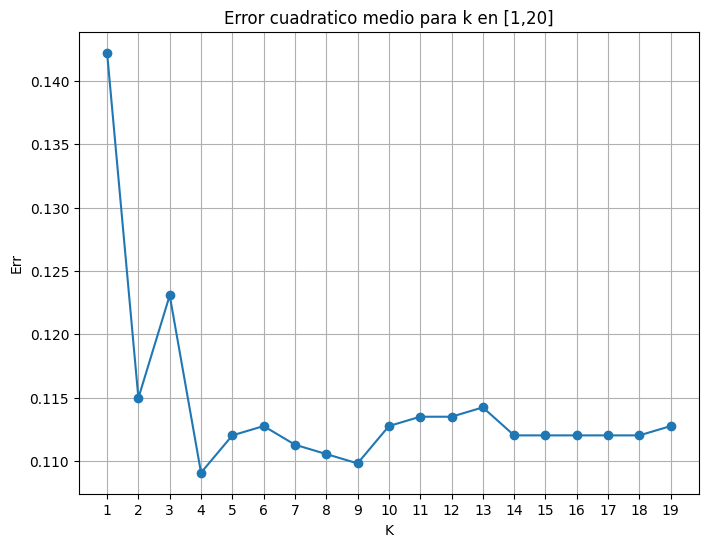

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, mean_sq_err, marker='o')
plt.title('Error cuadratico medio para k en [1,20]')
plt.xlabel('K')
plt.ylabel('Err')
plt.xticks(k_values)
plt.grid(True)

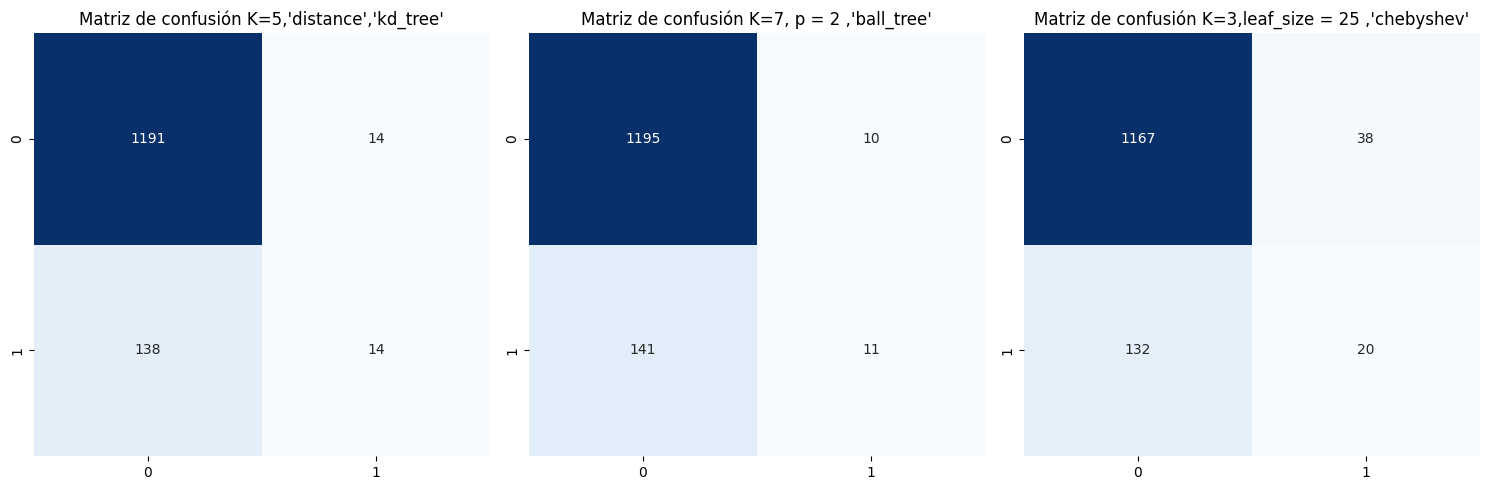

In [ ]:
cm_1 = metrics.confusion_matrix(y_test, y_pred_knn1)
cm_2 = metrics.confusion_matrix(y_test, y_pred_knn2)
cm_3 = metrics.confusion_matrix(y_test, y_pred_knn3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.heatmap(cm_1, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[0])
axes[0].set_title("Matriz de confusión K=5,'distance','kd_tree'")

sns.heatmap(cm_2, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[1])
axes[1].set_title("Matriz de confusión K=7, p = 2 ,'ball_tree'")

sns.heatmap(cm_3, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[2])
axes[2].set_title("Matriz de confusión K=3,leaf_size = 25 ,'chebyshev'")

plt.tight_layout()

## 8.- Realizar un gráfico para Decision Tree

## Explicar las decisiones tomadas y los pasos realizados (5 ptos.):



Respuesta:
---
Creamos 3 figuras, una por cada ajuste, que representan el árbol de decisión que crea el algoritmo. Este se genera usando la librería graphviz. Para esto utilizamos la función tree.export_graphviz con los siguientes parámetros: out_file=None indica que no se debe escribir el resultado en un archivo. filled=True y rounded=True hace que los nodos se coloreen y tengan bordes redondeados. Este paso genera la cadena. Luego con graphviz.Source() se genera el grafo y luego se muestra.

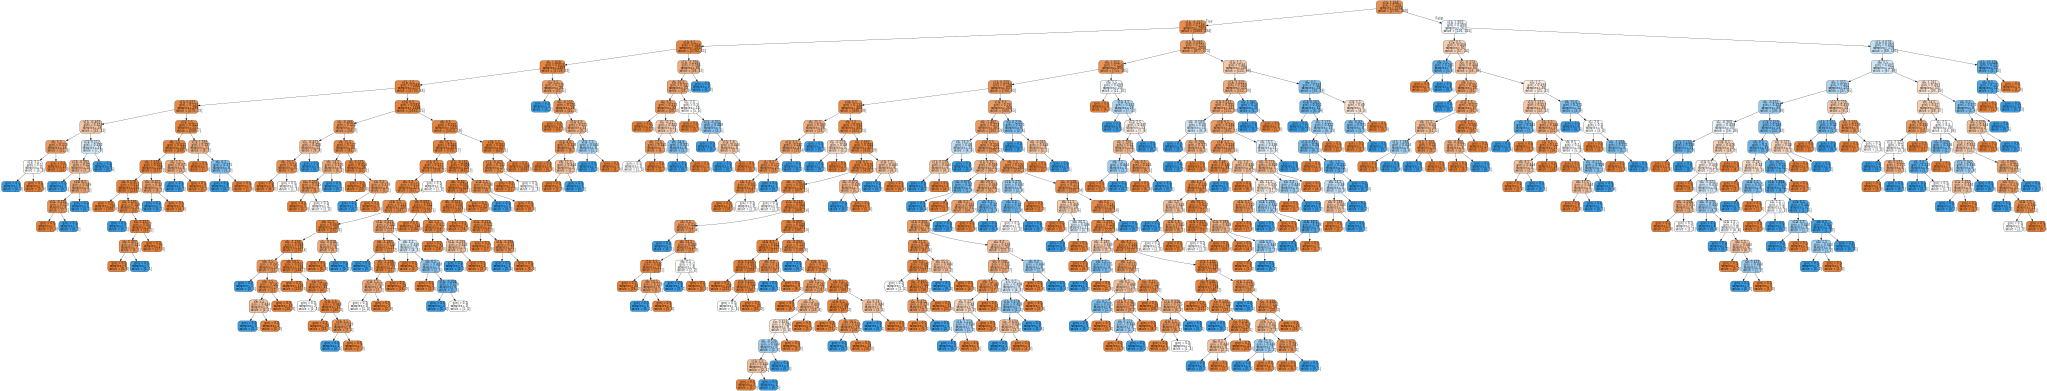

In [ ]:
dot_data = tree.export_graphviz(clf1,out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
dot_data = tree.export_graphviz(clf2,out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

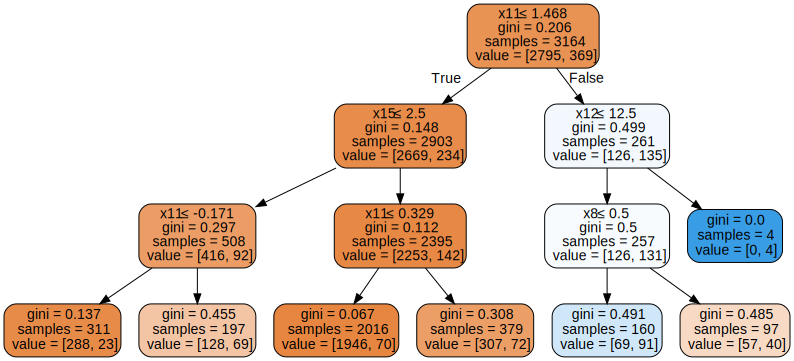

In [ ]:
dot_data = tree.export_graphviz(clf3,out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph